### 타이타닉 데이터셋 관련 연습 문제 (2020/09/09):

1. 데이터 전처리
- Name 컬럼에서 호칭 추출(Mr., Mrs. , ...Dr. , Sir, ..) using 정규표현식
- Mr : 0, Mrs: 1, 나머지 : 2로 변경하여, gender 컬럼을 추가하여 값으로 저장
- Age열에 대해 빈칸은, 해당 데이터의 성별을 토대로, 전체 데이터에 대한  
  해당 성별 값의 평균으로 대체  
  ex) 성별이 남성, age가 결측값인 경우에는, 남성 age 평균값으로 대체...
  
- FamilySize 컬럼 추가, 컬럼 값은 SibSp+Parch값으로 함
- Fare열에 대한 평균, 중위수를 구함(극단치 존재 여부 확인)

> Age 열에 대해 중복된 데이터는 모두 제거 (저장 하지는 말고 연습만)

- Cabin열에 대해 unique한 데이터를 추출

- Age열에 대해 value_counts함수 or cut함수를 이용하여 구간을 나누어 데이터 개수를 세기  
  0-19,20-39,40-59,60- 연속형 데이터 -> 카테고리형(범주) 데이터

- 연령대별 생존율/사망율 구하기

    - Embarked 컬럼값에 대해 항구별 승선인원 세기(비율)

    - Survived컬럼에 대해 생존(1)/사망(0) 인원수 및 비율

    - 성별에 따른 생존율/사망율 구하기

In [473]:
import pandas as pd
import numpy as np

In [474]:
titan=pd.read_csv('train.csv')
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [475]:
titan['gender']=None

In [476]:
for i, k in enumerate(titan['Name']):
    if 'Mr.' in k:
        titan.loc[i,['gender']]=0
    elif 'Mrs.' in k:
        titan.loc[i,['gender']]=1
    else:
        titan.loc[i,['gender']]=2

In [477]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [478]:
count_gender=titan.groupby('Sex').count()
count_gender

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
Sex,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314
male,577,577,577,577,453,577,577,577,577,107,577,577


In [479]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [480]:
allAge=titan.groupby('Sex').Age.transform(fill_na_mean)
allAge

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [481]:
titan.Age=titan.Age.fillna(allAge).round(decimals=0)
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [483]:
titan['FamilySize']=titan['SibSp']+titan['Parch']

In [484]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,2,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [489]:
x=titan.Fare
x.mean()

32.2042079685746

In [490]:
x.median()

14.4542

In [491]:
q1=np.percentile(x,25)
q3=np.percentile(x,75)
print(q1, q3)

7.9104 31.0


In [492]:
IQR=q3-q1
IQR #23.0896

23.0896

In [527]:
y1=q1-IQR*1.5 #-26.724

In [528]:
y2=IQR*1.5 + q3 #65.6344

In [506]:
x.all

<bound method Series.all of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [534]:
# x[x>y1,x<y2]
x[x<y1].count() #0
x[x>y2].count() #116 극단치 개수

116

In [536]:
titan.drop_duplicates(['Age'], keep=False, inplace=False) #저장 안함

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,FamilySize
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,0,0
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,2,1
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1,2
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,0
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.0,0,1,2625,8.5167,NaN,C,2,1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,0


In [538]:
# Cabin열에 대해 unique한 데이터를 추출
titan['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [540]:
# Age열에 대해 value_counts함수 or cut함수를 이용하여 구간을 나누어 데이터 개수를 세기  
#   0-19,20-39,40-59,60- 연속형 데이터 -> 카테고리형(범주) 데이터
age_range = pd.cut(titan['Age'], bins=[0,20,40,60,100])
age_range

0      (20, 40]
1      (20, 40]
2      (20, 40]
3      (20, 40]
4      (20, 40]
         ...   
886    (20, 40]
887     (0, 20]
888    (20, 40]
889    (20, 40]
890    (20, 40]
Name: Age, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 100]]

In [543]:
pd.value_counts(age_range)

(20, 40]     563
(0, 20]      179
(40, 60]     126
(60, 100]     22
Name: Age, dtype: int64

In [550]:
# - 연령대별 생존율/사망율 구하기
#     - Embarked 컬럼값에 대해 항구별 승선인원 세기(비율)
#     - Survived컬럼에 대해 생존(1)/사망(0) 인원수 및 비율
#     - 성별에 따른 생존율/사망율 구하기
embraked_df = pd.DataFrame(titan['Embarked'].value_counts())

In [551]:
embraked_df['percentage'] = titan['Embarked'].value_counts()/len(titan['Embarked'])*100

In [552]:
embraked_df #참조: 민채정

,Embarked,percentage
S,644,72.278339
C,168,18.855219
Q,77,8.641975


##### Survived컬럼에 대해 생존(1)/사망(0) 인원수 및 비율

In [565]:
df_DS=pd.DataFrame(titan['Survived'].value_counts())
df_DS['Percentage'] = titan['Survived'].value_counts()/len(titan['Survived'])*100

In [566]:
df_DS

,Survived,Percentage
0,549,61.616162
1,342,38.383838


##### 성별에 따른 생존율/사망율 구하기

In [568]:
survived_sex = titan[['PassengerId', 'Survived', 'Sex']].groupby(by = ['Sex', 'Survived']).count()
survived_sex

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

##### 10-1. 여자 승객 생존율/사망율

In [569]:
female_survived = survived_sex.loc['female']
female_survived.columns = ['female passenger']
female_survived['percentage(%)'] = female_survived/female_survived.sum()*100
female_survived

,female passenger,percentage(%)
Survived,,
0,81,25.796178
1,233,74.203822


##### 10-2. 남자 승객 생존율/사망율

In [23]:
male_survived = survived_sex.loc['male']
male_survived.columns = ['male passenger']
male_survived['percentage(%)'] = male_survived/male_survived.sum()*100
male_survived

,male passenger,percentage(%)
Survived,,
0,468,81.109185
1,109,18.890815


### 09/10

### 타이타닉 데이터셋에 대해 아래에 기술된 작업을 수행하시오. (2020/09/10)

1. survived 컬럼을 그룹화 -> age 열 평균을 구하여 비교

2. fare의 평균(임계값) -> fare 열 값을 이진화

3. embarked 컬럼값에 대해 각 승선항 별 승선인원수

4. sibsp 컬럼값에 대해 표준화

5. parch 컬럼값에 대해 표준화

6. fare 컬럼값에 대해 표준화

7. pclass와 survived 간에 상관관계 및 해석

8. sibsp : 1, parch:2, fare:50인 승객이 있다. (4,5,6 표준화 할때 이데이터도 같이 해놓으면 용이함)

이 승객은 살았을까 죽었을까?

해결방법 예시) 3차원 공간(sibsp, parch, fare)에서 (1,2,50)의 위치와 가장

가까운 위치에 있는 데이터 11건을 검색한다.

-> 검색된 11건의 데이터에 대한 생존여부(survived)를 추출한다

-> 다수결로 생존여부를 판단한다

In [279]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

In [45]:
titan2=pd.read_csv('train.csv')
titan2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
# 1. survived 컬럼을 그룹화 -> age 열 평균을 구하여 비교
titan2.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [80]:
fare2D=np.array(titan2['Fare']).reshape(-1,1)

# 2. fare의 평균(임계값 threshold value) -> fare 열 값을 이진화

### 2-1

In [81]:
# 2. fare의 평균(임계값 threshold value) -> fare 열 값을 이진화
tv=titan2['Fare'].mean()
bin_fare2D=binarize(fare2D, threshold=tv, copy=False)

In [82]:
bin_fare2D #2d array

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [85]:
bin_fare1D=bin_fare2D.flatten() #1d array
bin_fare1D

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

### 2-2

In [277]:
fare = np.array(titan2['Fare']).reshape(-1, 1)

In [280]:
Binarizer(threshold=titan2["Fare"].mean()).fit_transform(fare)

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

# 3. embarked 컬럼값에 대해 각 승선항 별 승선인원수

In [93]:
titan2.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [117]:
s_count=0
c_count=0
q_count=0
null_count=0
for i in titan2.Embarked:
    if i == 'S':
        s_count+=1
    elif i == 'C':
        c_count+=1
    elif i == 'Q':
        q_count+=1
    else:
        null_count+=1

In [98]:
titan2.Embarked.isnull().sum(axis=0)

2

In [119]:
s_count, c_count, q_count, null_count

(644, 168, 77, 2)

In [276]:
titan2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [363]:
# 8번 문제를 위해 행 추가
eight=pd.DataFrame([{'SibSp': 1, 'Parch': 2, 'Fare': 50}])
eight
df_eight=pd.concat([titan2,eight], ignore_index=True)
df_eight

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [213]:
# 소수점 조정
np.set_printoptions(precision=2)

In [291]:
# 이상치 행 제거 (출처: 민채정)
def remove_outlier(titan2, columns):
    q1=np.percentile(titan2[columns],25)
    q3=np.percentile(titan2[columns],75)
    IQR=q3-q1
    
    outlier_min = q1-IQR*1.5 
    outlier_max = q3+IQR*1.5 
    
    remove_index = titan2[(titan2[columns]<outlier_min)|(titan2[columns]>outlier_max)].index
    titan2.drop(remove_index, inplace=True)
    return titan2

In [293]:
# 표준화 (출처: 민채정)
def standardization(titan2_columns):
    titan2_columns = RobustScaler().fit_transform(np.array(titan2_columns).reshape(-1, 1))
    return titan2_columns

## 4. sibsp 컬럼값에 대해 표준화

(array([608., 210.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

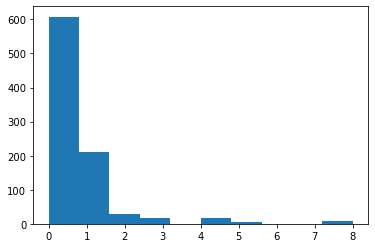

In [225]:
#이상치가 제거되지 않음
sibsp = df.SibSp
sibsp2d=np.array(sibsp).reshape(-1,1)
sibsp_st_r=RobustScaler().fit_transform(sibsp2d)
plt.hist(sibsp_st_r)

(array([608.,   0.,   0.,   0.,   0., 210.,   0.,   0.,   0.,  28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

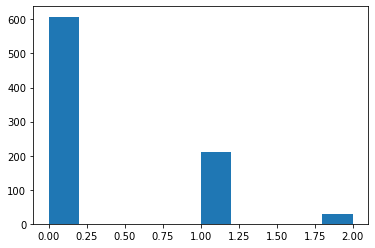

In [294]:
df = remove_outlier(df.copy(), "SibSp")
plt.hist(standardization(df["SibSp"]))

## 5. Parch 컬럼값에 대해 표준화

(array([  0.,   0.,   0.,   0.,   0., 676.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

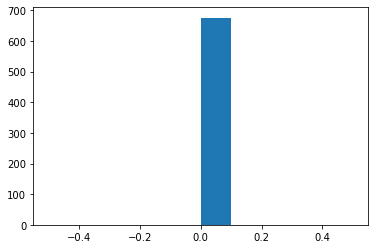

In [295]:
df = remove_outlier(df.copy(), "Parch")
plt.hist(standardization(df["Parch"]))

## 6. Fare 컬럼값에 대해 표준화

(array([ 17., 337.,  92.,  24.,  42.,  43.,  10.,   5.,   1.,  20.]),
 array([-1.08, -0.42,  0.24,  0.91,  1.57,  2.23,  2.89,  3.55,  4.21,
         4.88,  5.54]),
 <a list of 10 Patch objects>)

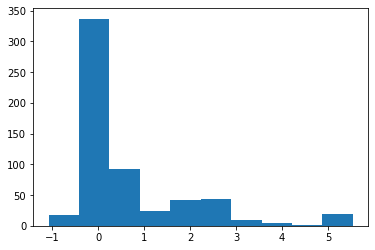

In [296]:
df = remove_outlier(df.copy(), "Fare")
plt.hist(standardization(df["Fare"]))

질문: 이 그래프는 이상치를 고려하지 않은 것이지만, 이상치를 제거 해야할지, 말아야 할지 무엇을 기준으로 판단 하나요..

## 7. pclass와 survived 간에 상관관계 및 해석

In [287]:
titan2[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [289]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(titan2.Survived, titan2.Pclass)
corr

# r=-0.338
# p=~0
#결론 : Pclass와 Survived는 약한 음의 상관계수가 있음을 의미

(-0.33848103596101536, 2.537047387978631e-25)

https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221576394512&proxyReferer=https:%2F%2Fwww.google.com%2F  
좌: r (상관계수) , 우: p (유의확률)  
0.8<=r 강한 상관이 있다.  
0.6<=r 상관이 있다.  
0.4<=r<0.6 약한 상관이 있다.  
r<=0.4 거의 상관이 없다.  

p값 <0.05 = 상관관계가 있음을 의미  

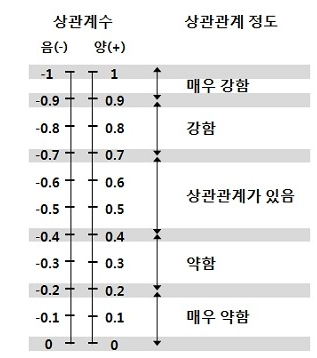

### 8. sibsp : 1, parch:2, fare:50인 승객이 있다. 이 승객은 살았을까 죽었을까?  
해결방법 예시) 3차원 공간(sibsp, parch, fare)[하나하나의 축으로 본다/ 표준화 필요]에서 (1,2,50)의 위치와 가장  
가까운 위치에 있는 데이터 11건을 검색한다.  
-> 검색된 11건의 데이터에 대한 생존여부(survived)를 추출한다  
-> 다수결로 생존여부를 판단한다

In [ ]:
from scipy.spatial import distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)

In [364]:
#정규화
from sklearn.preprocessing import minmax_scale
df_eight=pd.DataFrame(minmax_scale(df_eight[['SibSp','Parch','Fare']]), columns=[['SibSp','Parch','Fare']])
df_eight

,SibSp,Parch,Fare
0,0.125,0.000000,0.014151
1,0.125,0.000000,0.139136
2,0.000,0.000000,0.015469
3,0.125,0.000000,0.103644
4,0.000,0.000000,0.015713
...,...,...,...
887,0.000,0.000000,0.058556
888,0.125,0.333333,0.045771
889,0.000,0.000000,0.058556
890,0.000,0.000000,0.015127


In [414]:
from scipy.spatial import distance
dist_list=[]
for i,j in enumerate (np.array(df_eight.iloc[:])):
    if i < len(np.array(df_eight.iloc[:])):
        a=np.array(df_eight.iloc[:])[i]
        b=np.array(df_eight.iloc[-1])
        eucliDist=distance.euclidean(a,b)
        dist_list.append([eucliDist])

In [433]:
euc_df=pd.DataFrame(dist_list, columns=['euclidean_Dist'])
euc_list_df=df_eight.join(euc_df).join(pd.DataFrame(titan2['Survived']))
euc_list_df

,"(SibSp,)","(Parch,)","(Fare,)",euclidean_Dist,Survived
0,0.125,0.000000,0.014151,0.343619,0.0
1,0.125,0.000000,0.139136,0.335912,1.0
2,0.000,0.000000,0.015469,0.365350,1.0
3,0.125,0.000000,0.103644,0.333388,1.0
4,0.000,0.000000,0.015713,0.365295,0.0
...,...,...,...,...,...
887,0.000,0.000000,0.058556,0.358134,1.0
888,0.125,0.333333,0.045771,0.051822,0.0
889,0.000,0.000000,0.058556,0.358134,1.0
890,0.000,0.000000,0.015127,0.365427,0.0


In [438]:
euc_list_df.sort_values(by='euclidean_Dist')[1:12]['Survived'].value_counts()

1.0    6
0.0    5
Name: Survived, dtype: int64

Conclusion: 3차원 공간이 sibsp : 1, parch:2, fare:50인 승객포함, 정규화된 모든승객의 유클리디안 거리를 통하여 가장  
가까운 11명중 6명이 생존하였으므로, 해당 승객의 생존여부 == True